In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

**Importing the dataset**

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ShubhamAgr09/Training-Datasets/main/Social_Network_Ads.csv')

**Encoding**

In [4]:
df.Gender = df.Gender.map({'Male':1,
                           'Female':0
                          })

**EDA**

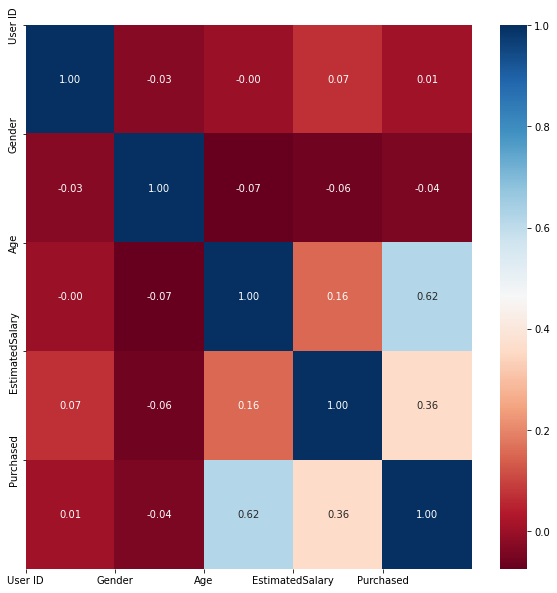

In [5]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

Dropping Age column as correlation between Age and Purchased represents non-linear relation.

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [7]:
X = df[['Age', 'EstimatedSalary']].values
y = df.iloc[:,-1].values

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=2)

**Feature Scaling**

As Random Forest does not require feature scaling, so we are going to skip this step.

**Fitting Random Forest to the Training set**

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#Choosing the best value for hyperparameter
for depth in [3,4,5,6,7,8,9,10,11]:
  model = RandomForestClassifier(n_estimators= 300, max_depth = depth, max_features='sqrt')
  model.fit(X_train,y_train) #train the model
  model.score(X_test, y_test) # scoring the model - r2 squared
  print("Max Depth : ", depth, " Train score : ", model.score(X_train,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, y_train, cv=10)))

Max Depth :  3  Train score :  0.928125  Cross-Val score :  0.9
Max Depth :  4  Train score :  0.93125  Cross-Val score :  0.909375
Max Depth :  5  Train score :  0.94375  Cross-Val score :  0.903125
Max Depth :  6  Train score :  0.9625  Cross-Val score :  0.896875
Max Depth :  7  Train score :  0.98125  Cross-Val score :  0.9
Max Depth :  8  Train score :  0.990625  Cross-Val score :  0.90625
Max Depth :  9  Train score :  0.996875  Cross-Val score :  0.896875
Max Depth :  10  Train score :  0.996875  Cross-Val score :  0.89375
Max Depth :  11  Train score :  1.0  Cross-Val score :  0.903125


**Predicting the Test set results**

In [10]:
model = RandomForestClassifier(n_estimators= 300, max_depth = 4, max_features='sqrt')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

**Extracting Feature Importance**

In [11]:
# Get numerical feature importances
importances = list(model.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: User ID              Importance: 0.53
Variable: Gender               Importance: 0.47


**Making the Confusion Matrix** 

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        48
           1       0.93      0.84      0.89        32

    accuracy                           0.91        80
   macro avg       0.92      0.90      0.91        80
weighted avg       0.91      0.91      0.91        80

Confusion Matrix:
[[46  2]
 [ 5 27]]


**Visualising the Training set results**

[Text(0.6190476190476191, 0.9, 'X[1] <= 87500.0\ngini = 0.466\nsamples = 192\nvalue = [202, 118]'),
 Text(0.38095238095238093, 0.7, 'X[1] <= 42500.0\ngini = 0.344\nsamples = 148\nvalue = [187, 53]'),
 Text(0.19047619047619047, 0.5, 'X[1] <= 22500.0\ngini = 0.5\nsamples = 44\nvalue = [38, 36]'),
 Text(0.09523809523809523, 0.3, 'X[1] <= 19000.0\ngini = 0.208\nsamples = 11\nvalue = [15, 2]'),
 Text(0.047619047619047616, 0.1, 'gini = 0.0\nsamples = 6\nvalue = [10, 0]'),
 Text(0.14285714285714285, 0.1, 'gini = 0.408\nsamples = 5\nvalue = [5, 2]'),
 Text(0.2857142857142857, 0.3, 'X[0] <= 40.5\ngini = 0.481\nsamples = 33\nvalue = [23, 34]'),
 Text(0.23809523809523808, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [22, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.056\nsamples = 20\nvalue = [1, 34]'),
 Text(0.5714285714285714, 0.5, 'X[1] <= 72500.0\ngini = 0.184\nsamples = 104\nvalue = [149, 17]'),
 Text(0.47619047619047616, 0.3, 'X[1] <= 50500.0\ngini = 0.115\nsamples = 66\nvalue = [107, 7]'),
 Te

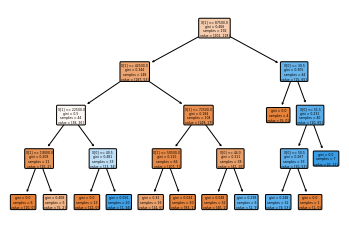

In [13]:
from sklearn import tree
tree.plot_tree(model.estimators_[0], 
              #  feature_names=df.feature_names,
              #  class_names=df.target_names,
               filled=True, impurity=True, 
               rounded=True)

**Visualising the Test set results**

0.8852459016393444


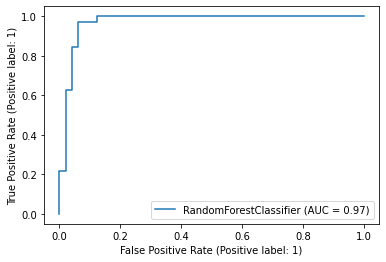

In [14]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, f1_score


print(f1_score(y_test,model.predict(X_test)))
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
plot_roc_curve(model, X_test, y_test) # plot_roc_curve(model,X_test,y_test) - Syntax : plot_roc_curve(model,fts_of_test, target_of_test)